<H1>AngelHack Monthly Code Challenge - April 2023</H1>

<h2>Theme: Data Visualisation And Storytelliing</he=

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Summary</a></li>
</ul>


<a name = "intro"></a>
## 1. Introduction
### 1.1 Dataset
> The THE World University Rankings provide the definitive list of the world’s best universities, with an emphasis on the research mission. It is the only global university league table to judge research-intensive universities across all of their core missions: teaching (the learning environment); research (volume, income and reputation); citations (research influence); industry income (knowledge transfer) and international outlook (staff, students and research). It uses 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons. The overall list is accompanied by 11 subject-specific rankings.
Original data, as well as ranking methodology described per each year, is available on the official website www.timeshighereducation.com

### 1.1 Objective
>Objective of this project is to create data visualisation and storyteling which is highly original and creative demostarating a  truly uniques and innovative approach to data storytelling





In [1]:
# import relevant library
import pandas as pd
import numpy as np
from pathlib import Path
import re
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get all datsets file path from Data directory
path_list=[]
paths = Path('Data').glob('*')
for file in paths:
    path_list.append(str(file))

In [3]:
# read and concat dataset for each year to a single df
df=[]
for datasets in path_list:
    data = pd.read_csv(datasets)
    data['year']=datasets[5:9]
    df.append(data)

df = pd.concat(df)# see pd.concat documentation for more info
df=df.reset_index(drop=True)

In [4]:
df.head(3)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,year
0,10,1,University of Oxford,94.3,10,86.7,5,99.5,1,99.1,...,United Kingdom,"20,410",11.2,38%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2018
1,20,2,University of Cambridge,93.2,20,87.8,3,97.8,3,97.5,...,United Kingdom,"18,390",10.9,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2018
2,30,=3,California Institute of Technology,93.0,30,90.3,1,97.5,4,99.5,...,United States,"2,209",6.5,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2018


In [5]:
# number of rows and columns
print(f'{df.shape[0]} number of rows', ) 
print(f'{ df.shape[1]} number of columns',)

13325 number of rows
25 number of columns


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13325 entries, 0 to 13324
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         13325 non-null  int64  
 1   rank                               13325 non-null  object 
 2   name                               13325 non-null  object 
 3   scores_overall                     12329 non-null  object 
 4   scores_overall_rank                13325 non-null  int64  
 5   scores_teaching                    12329 non-null  float64
 6   scores_teaching_rank               13325 non-null  int64  
 7   scores_research                    12329 non-null  float64
 8   scores_research_rank               13325 non-null  int64  
 9   scores_citations                   12329 non-null  float64
 10  scores_citations_rank              13325 non-null  int64  
 11  scores_industry_income             12329 non-null  obj

<a name = "wrangling"></a>
##  2. Data Wrangling

In [7]:
# Number of missing values
(df.isnull().sum()[df.isnull().sum()> 0])

scores_overall                   996
scores_teaching                  996
scores_research                  996
scores_citations                 996
scores_industry_income           996
scores_international_outlook     996
stats_number_students           1803
stats_student_staff_ratio       1804
stats_pc_intl_students          1803
stats_female_male_ratio         2330
subjects_offered                  49
dtype: int64

In [8]:
#percentage of missing values
(df.isnull().sum()[df.isnull().sum()> 0])/df.shape[0] *100

scores_overall                   7.474672
scores_teaching                  7.474672
scores_research                  7.474672
scores_citations                 7.474672
scores_industry_income           7.474672
scores_international_outlook     7.474672
stats_number_students           13.530957
stats_student_staff_ratio       13.538462
stats_pc_intl_students          13.530957
stats_female_male_ratio         17.485929
subjects_offered                 0.367730
dtype: float64

They are columns in the datasets that will have no effect on the project and need to be droped. These columns are: `scores_overall`, `scores_teaching`, `scores_research`,`scores_citations`, and `scores_industry_income` and `scores_international_outlook` and this is because the ranks for these columns already exist.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13325 entries, 0 to 13324
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         13325 non-null  int64  
 1   rank                               13325 non-null  object 
 2   name                               13325 non-null  object 
 3   scores_overall                     12329 non-null  object 
 4   scores_overall_rank                13325 non-null  int64  
 5   scores_teaching                    12329 non-null  float64
 6   scores_teaching_rank               13325 non-null  int64  
 7   scores_research                    12329 non-null  float64
 8   scores_research_rank               13325 non-null  int64  
 9   scores_citations                   12329 non-null  float64
 10  scores_citations_rank              13325 non-null  int64  
 11  scores_industry_income             12329 non-null  obj

In [10]:
#drops the above column list as it will have no effect on the project
columns=['scores_overall', 'scores_teaching', 'scores_research', 'scores_citations',
         'scores_industry_income', 'scores_international_outlook']
df=df.dropna(subset=columns)
df=df.reset_index(drop=True)

In [11]:
df.isnull().sum()[df.isnull().sum()> 0]

stats_number_students        1803
stats_student_staff_ratio    1803
stats_pc_intl_students       1803
stats_female_male_ratio      2317
subjects_offered               46
dtype: int64

Rows with missing values in columns like `stats_number_students`, `stats_student_staff_ratio`, `stats_pc_intl_students` and `stats_female_male_ratio`would be drop as they constitues less than 15% of data. 

In [12]:
# rank
df['rank']= df['rank'].str.replace('=', '')

In [13]:
# stats_number_students
df['stats_number_students']=df['stats_number_students'].fillna(df['stats_number_students'].mode()[0])
df['stats_number_students']= df['stats_number_students'].str.replace(',', '')

In [14]:
# stats_pc_intl_students
df['stats_pc_intl_students']=df['stats_pc_intl_students'].fillna(df['stats_pc_intl_students'].mode()[0])
df['stats_pc_intl_students']= df['stats_pc_intl_students'].str.replace('%', '')
df['stats_pc_intl_students']=df['stats_pc_intl_students'].str.replace('','0')

In [15]:
# stats_student_staff_ratio
df['stats_student_staff_ratio']=df['stats_student_staff_ratio'].fillna(df['stats_student_staff_ratio'].mode()[0])

In [16]:
# seperate female to male ratios using regex
df['stats_female_male_ratio']=df['stats_female_male_ratio'].fillna(df['stats_female_male_ratio'].mode()[0])
male=df['stats_female_male_ratio'].str.findall('\s\d{2}')
female=df['stats_female_male_ratio'].str.findall('\d{2}.')

In [17]:
# Empty male and female list
maleList=[]
femaleList=[]
def genderNumber(gender,  list_):#     Function to parse male female ratio
    for x in list(gender):
            i=re.search('\d{3}|\d{2}|\d{1}', str(x))
            try:
                list_.append(i.group())
            except:
                list_.append(np.nan)
                
# function call
genderNumber(female, femaleList)
genderNumber(male, maleList)    

In [18]:
#crating a pandas series from list
df['female']=pd.Series(femaleList)
df['male']=pd.Series(maleList)
# droping stats_female_male_ratio column
# df = df.drop('stats_female_male_ratio', axis=1)

In [19]:
df=df.dropna()
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [20]:
#Casting to appropriate data types
df['stats_number_students']=df['stats_number_students'].astype(int) #casting to int
df['male']=df['male'].astype(int) #casting to int
df['female']=df['female'].astype(int) #casting to int
df['stats_pc_intl_students']=df['stats_pc_intl_students'].astype(float) #casting to float
df['year']=pd.to_datetime(df['year']).dt.year #casting year object to datetime

<a name = "eda"></a>
## 3. Exploratory Data Analysis

###  Total numbers of universities by the years

In [21]:
# group by year
year_counts=df.groupby('year').count()['name']

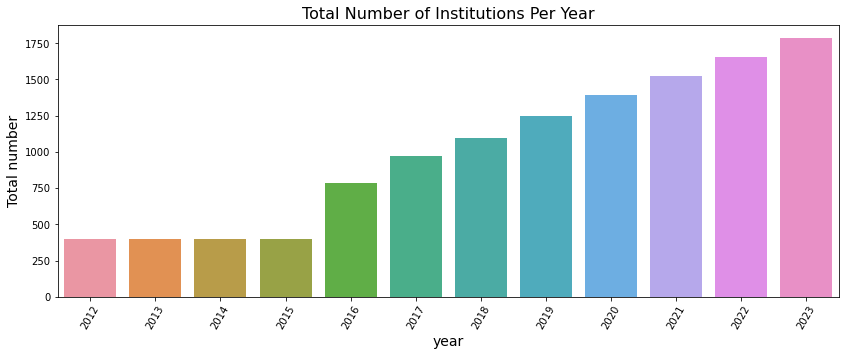

In [22]:
#bar graph
fig=plt.figure(figsize=(14,5))
sns.barplot(x=year_counts.index, y=year_counts)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('year', fontsize='14')
plt.title('Total Number of Institutions Per Year', fontsize='16')
plt.xticks(rotation=60)
plt.show()

- A total of `198` institution in `2011` and a  total of `1787` in `2023`. This represent a `900%` increase over the course of 13 years.
- They is a linear `increase` in the total number of institutions per from `2016` t0 `2023` and `no significant change` in the number of institutions form `2012` to `2015`.

###  Total Number Of University By Continent

In [23]:
# !pip install pycountry-convert
import pycountry_convert as pc
def countryToContinent(countryName):
#     function to get continent names form country names
    country_alpha2= pc.country_name_to_country_alpha2(countryName)
    country_continent_code= pc.country_alpha2_to_continent_code(country_alpha2)
    continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return continent_name


In [24]:
df['continent']=df['location'].apply(countryToContinent) #new column with continent
continent_count=df['continent'].value_counts()

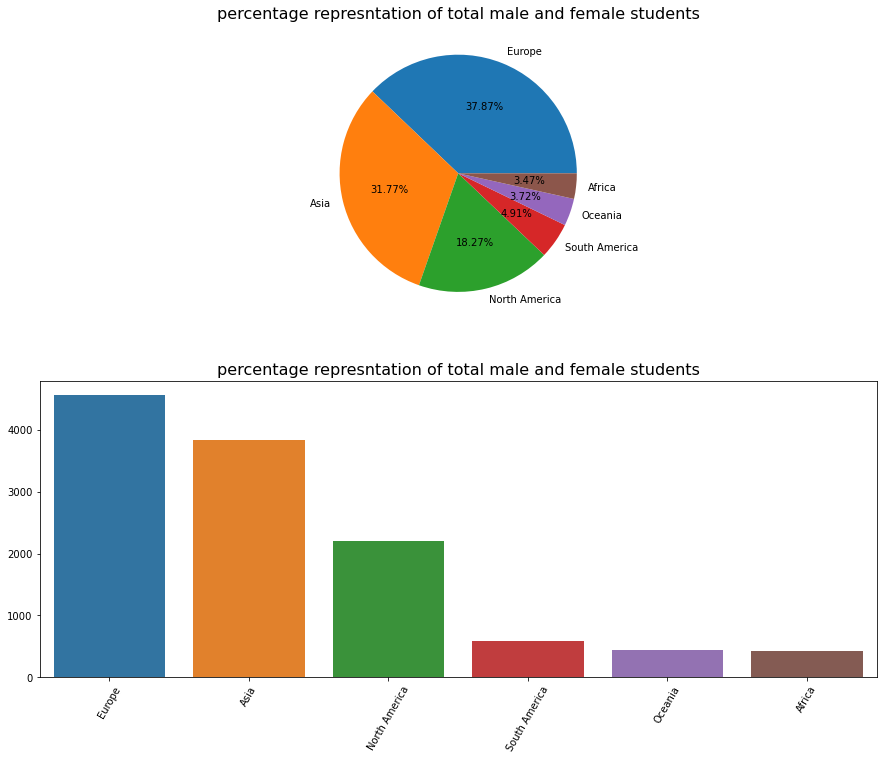

In [25]:
# fig size
fig=plt.figure(figsize=(15,12))
# pie chart

ax1=fig.add_subplot(211)
plt.title("percentage represntation of total male and female students",  fontsize='16')
ax1.pie(continent_count.values, labels=continent_count.index,autopct='%1.2f%%')


ax2=ax1=fig.add_subplot(212)
plt.title("percentage represntation of total male and female students",  fontsize='16')
sns.barplot(x=continent_count.index, y=continent_count.values)
plt.xticks(rotation=60)

plt.show()

`Europe` has the highest number of institutions `38%` while `Africa` has the lowest number of institution `3.47%`

###  Total Number Of Student Over The Years

In [26]:
# group by year
student_counts=df.groupby('year').sum()['stats_number_students']

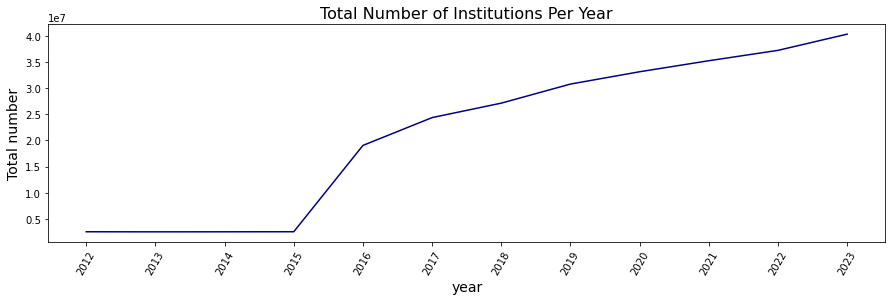

In [27]:
#bar graph
fig=plt.figure(figsize=(15,4))
sns.lineplot(x=student_counts.index, y=student_counts, color='navy')
plt.ylabel('Total number', fontsize='14')
plt.xlabel('year', fontsize='14')
plt.title('Total Number of Institutions Per Year', fontsize='16')
plt.xticks(student_counts.index,rotation=60)
plt.show()

### Total Ratio Of Male To Female

In [28]:
# group by year
male=df['male'].sum()
female=df['female'].sum()
male_percentage=round(male/(male+female)*100)
female_percentage=round(female/(male+female)*100)

In [29]:
gender_sum=df[['male','female']].sum()

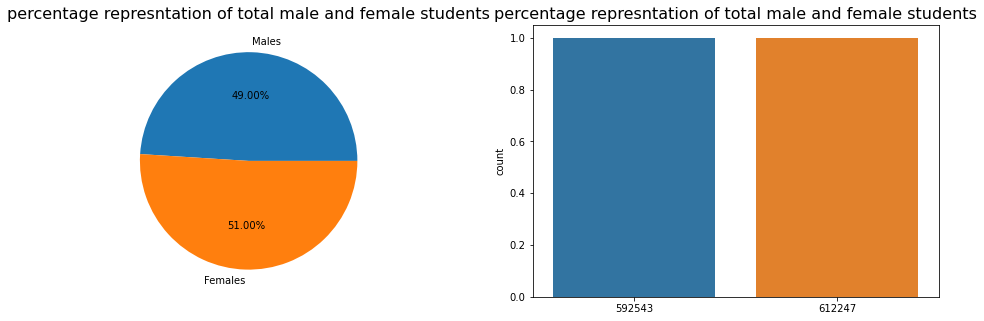

In [30]:
# fig size
fig=plt.figure(figsize=(16,5))
# pie chart

ax1=fig.add_subplot(121)
plt.title("percentage represntation of total male and female students",  fontsize='16')
ax1.pie([male_percentage,female_percentage], labels=['Males', 'Females'],autopct='%1.2f%%')


ax2=ax1=fig.add_subplot(122)
plt.title("percentage represntation of total male and female students",  fontsize='16')
sns.countplot(gender_sum)

plt.show()

Total Numbers of male to female `almost seems` to be `equal`

###  Total Ratio Of Male To Female By Year

In [31]:
# group by year
males=df.groupby('year').sum()['male']
females=df.groupby('year').sum()['female']

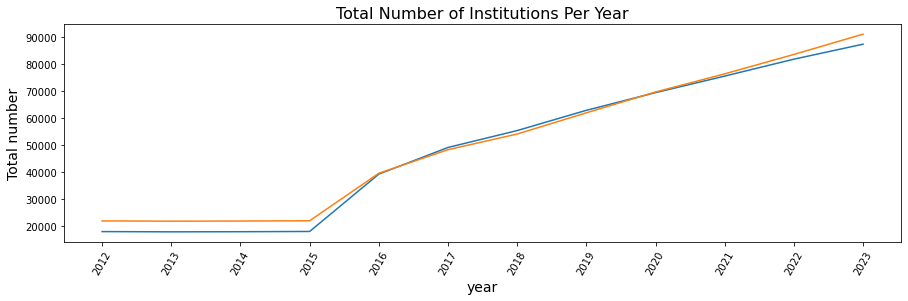

In [32]:
#bar graph
fig=plt.figure(figsize=(15,4))
sns.lineplot(x=males.index, y=males)
sns.lineplot(x=males.index, y=females)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('year', fontsize='14')
plt.title('Total Number of Institutions Per Year', fontsize='16')
plt.xticks(student_counts.index,rotation=60)
plt.show()

Total Number of female and male are almost `equal` from `2016` to `2022` with a `little` diffrences from `2011` to `2015`

###  Total Number Of International Students  Per Year

In [33]:
# group by year
student_counts=df.groupby('year').sum()['stats_pc_intl_students']

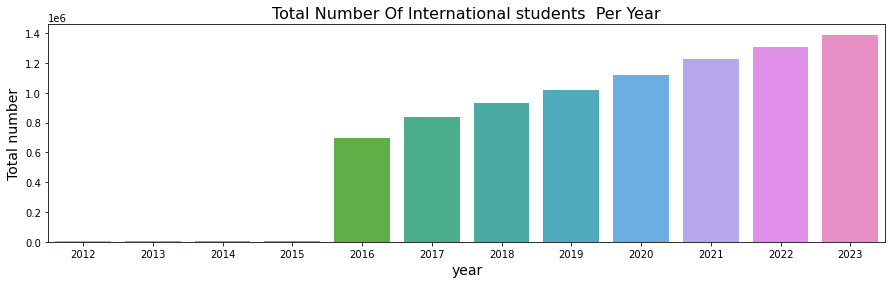

In [34]:
#bar graph
fig=plt.figure(figsize=(15,4))
sns.barplot(x=student_counts.index, y=student_counts)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('year', fontsize='14')
plt.title('Total Number Of International students  Per Year', fontsize='16')
# plt.xticks(student_counts.index,rotation=60)
plt.show()

They has been a significant rise in the total number International of student from  `1980` in `2016`  to `1388730` in `2023`

### Number of Institution Who  Ranked First from 2011 to 2023

In [35]:
first=df[df['rank']=='1'][['name', 'rank','year']]
first=first.reset_index(drop=True)
first_count=first['name'].value_counts()

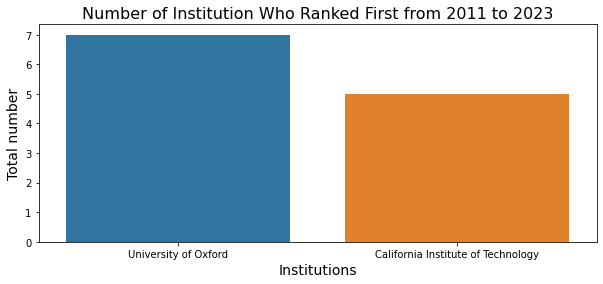

In [36]:
#bar graph
fig=plt.figure(figsize=(10,4))
sns.barplot(x=first_count.index, y=first_count)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('Institutions', fontsize='14')
plt.title('Number of Institution Who Ranked First from 2011 to 2023', fontsize='16')
plt.show()

`University of Oxford` have Ranked `First 7 times` while `California institute of technology` ranked `first 5` times from 2011 to 2023

### Number of InstitutionS Who Ranked Second from 2011 to 2023

In [37]:
second=df[df['rank']=='2'][['name', 'rank','year']]
second=second.reset_index(drop=True)
second_count=second['name'].value_counts()

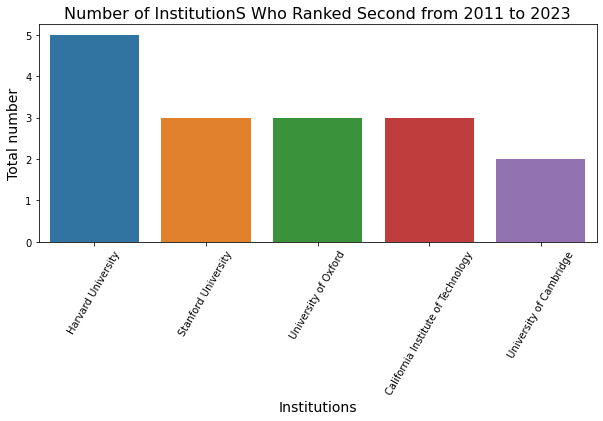

In [38]:
#bar graph
fig=plt.figure(figsize=(10,4))
sns.barplot(x=second_count.index, y=second_count)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('Institutions', fontsize='14')
plt.title('Number of InstitutionS Who Ranked Second from 2011 to 2023', fontsize='16')
plt.xticks(rotation=60)
plt.show()


`Harvard University` Ranked `second 5 times` while `Stanford, Oxford and CIT ranked second 4 times` from 2011 to 2023

### Number Of Institutions Who  Ranked Third from 2011 to 2023

In [39]:
third=df[df['rank']=='3'][['name', 'rank','year']]
third=third.reset_index(drop=True)
third_count=third['name'].value_counts()

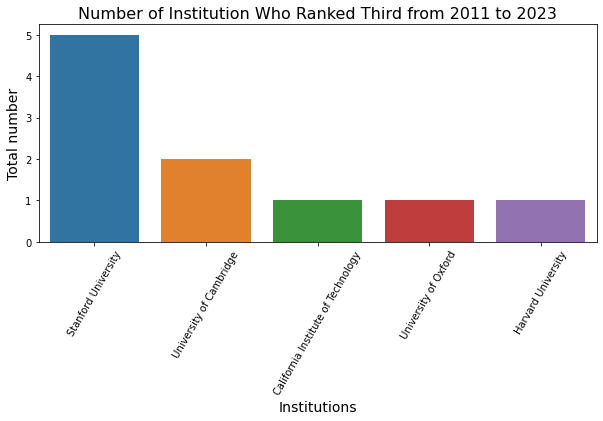

In [40]:
#bar graph
fig=plt.figure(figsize=(10,4))
sns.barplot(x=third_count.index, y=third_count)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('Institutions', fontsize='14')
plt.title('Number of Institution Who Ranked Third from 2011 to 2023', fontsize='16')
plt.xticks(rotation=60)
plt.show()

`Stanford University` ranked `Thrid 5 times` while `Cambridge ranked thrid 2 times` from 2011 to 2023

### Number Of Institutions Who Ranked Fourth from 2011 to 2023

In [41]:
fourth=df[df['rank']=='4'][['name', 'rank','year']]
fourth=fourth.reset_index(drop=True)
fourth_count=fourth['name'].value_counts()

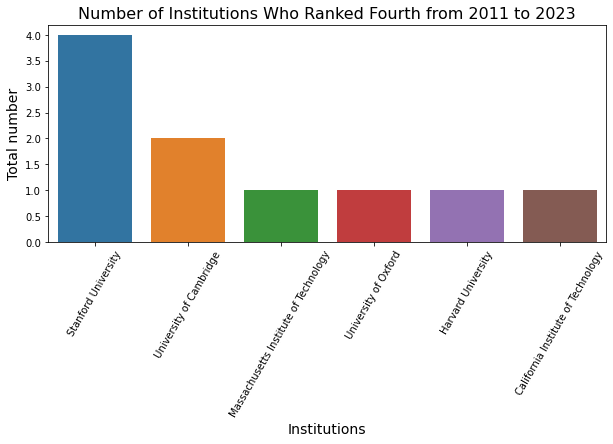

In [42]:
#bar graph
fig=plt.figure(figsize=(10,4))
sns.barplot(x=fourth_count.index, y=fourth_count)
plt.ylabel('Total number', fontsize='14')
plt.xlabel('Institutions', fontsize='14')
plt.title('Number of Institutions Who Ranked Fourth from 2011 to 2023', fontsize='16')
plt.xticks(rotation=60)
plt.show()

`Stanford University` ranked `fourth 4 times` while `Cambridge fourth 2 times` from 2011 to 2023

In [43]:
# save cleaaned dataset
df.to_csv('cleaned_data.csv', index=False)

<a name="conclusions"></a>
    
## 4. Summary

> - The dataset was first cleaned by dropping rows columns which are identification irrelevanto the analysis. NAN values were drop, filled with mean, or median depending on the distribution of the columns.

> - Both univariate and bivariate anlaysis were done to get insights about the dataset. such insight include will help organise the the thought process for the  final dashboard